# 16기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [142]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [30]:
# 수치형 변수
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [32]:
# 이산형 변수
df.describe(include='O')

,Gender
count,200
unique,2
top,Female
freq,112


In [34]:
df.shape

(200, 4)

# Packages

In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

## 결측치 처리

In [3]:
print('총 데이터 개수:',len(df))

총 데이터 개수: 200


In [4]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

결측치는 없다.

## Data Exploration

### * Gender

([<matplotlib.patches.Wedge at 0x17269011160>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

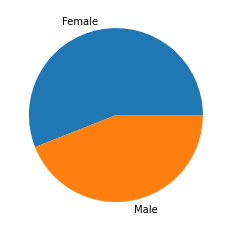

In [33]:
gender_count = df['Gender'].value_counts()
plt.pie(gender_count, labels = gender_count.index)

여성이 더 많다.

### * Age

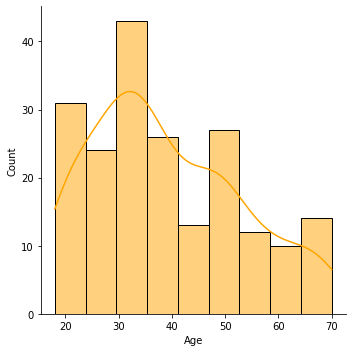

In [70]:
sns.displot(x = 'Age', data = df, color='orange', kde = True)

30대 초반이 가장 많다.

### * Annual Income (k$)

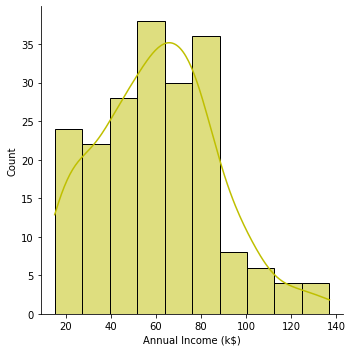

In [71]:
sns.displot(x = 'Annual Income (k$)', data = df, color='y', kde = True)

### * Spending Score (1-100)

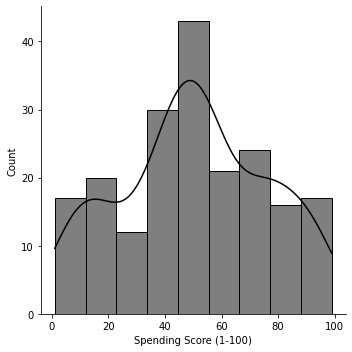

In [72]:
sns.displot(x = 'Spending Score (1-100)', data = df, color = 'black', kde = True)

### * Gender x Age

Text(0.5, 0.98, 'Gender x Age')

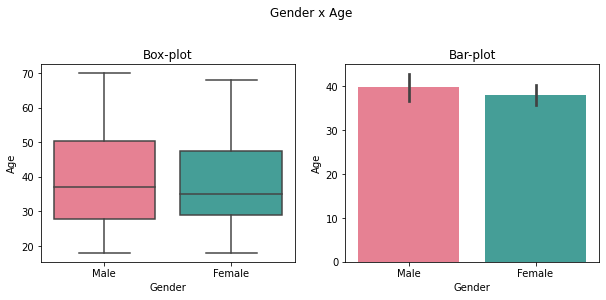

In [63]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('Box-plot')
sns.boxplot(x=df['Gender'],y=df['Age'], palette='husl')

plt.subplot(2,2,2)
plt.title('Bar-plot')
sns.barplot(x='Gender',y='Age', palette = 'husl', data=df)

plt.suptitle('Gender x Age')

### * Gender x Annual Income (k$)

Text(0.5, 0.98, 'Gender x Annual Income (k$)')

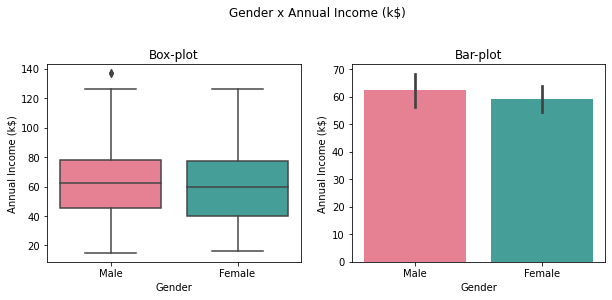

In [62]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('Box-plot')
sns.boxplot(x=df['Gender'],y=df['Annual Income (k$)'], palette='husl')

plt.subplot(2,2,2)
plt.title('Bar-plot')
sns.barplot(x='Gender',y='Annual Income (k$)', palette = 'husl', data=df)

plt.suptitle('Gender x Annual Income (k$)')

### * Gender x Spending Score (1-100)

Text(0.5, 0.98, 'Gender x Spending Score (1-100)')

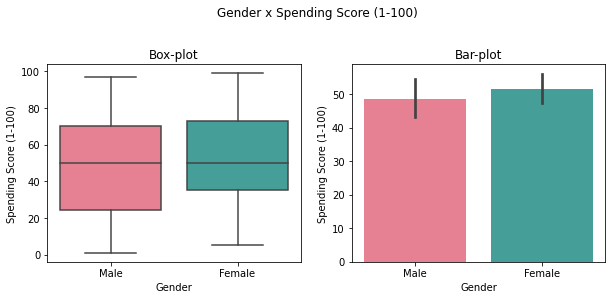

In [61]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('Box-plot')
sns.boxplot(x=df['Gender'],y=df['Spending Score (1-100)'], palette='husl')

plt.subplot(2,2,2)
plt.title('Bar-plot')
sns.barplot(x='Gender',y='Spending Score (1-100)', palette = 'husl', data=df)

plt.suptitle('Gender x Spending Score (1-100)')

### * Correlations

In [84]:
numeric_col = df.columns.tolist()[1:]
numeric_col

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

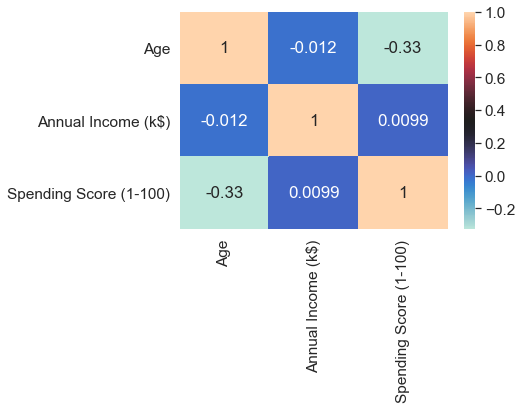

In [108]:
sns.heatmap(df[numeric_col].corr(), annot = True, cmap = "icefire")

## Preprocessing

### 범주형 변수 수치화
* male -> 1 <br>
female -> 0

In [64]:
df['Gender']

CustomerID
1        Male
2        Male
3      Female
4      Female
5      Female
        ...  
196    Female
197    Female
198      Male
199      Male
200      Male
Name: Gender, Length: 200, dtype: object

In [143]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df.iloc[:,0])
df['Gender']

CustomerID
1      1
2      1
3      0
4      0
5      0
      ..
196    0
197    0
198    1
199    1
200    1
Name: Gender, Length: 200, dtype: int32

# Clustering

In [161]:
def Elbow(df):
    k_list = []
    wcss_scores = []
#     silhouette_scores = []

    for i in range(1,11):
        k_list.append(i)
        kmeans_test = KMeans(n_clusters = i)
        kmeans_test.fit(df)
#         kmeans_cluster = kmeans.predict(df)
        wcss_scores.append(kmeans_test.inertia_)
#         silhouette_scores.append(silhouette_score(df, kmeans_cluster))

    plt.figure(figsize=(9,6))
    plt.plot(range(1, 11), wcss_scores)
    plt.plot(range(1, 11),wcss_scores,'bo-')
    plt.title('Elbow')
    plt.xlabel('Number of clusters')
    plt.xticks(np.arange(1,11))
    plt.ylabel('WCSS')
    plt.show()

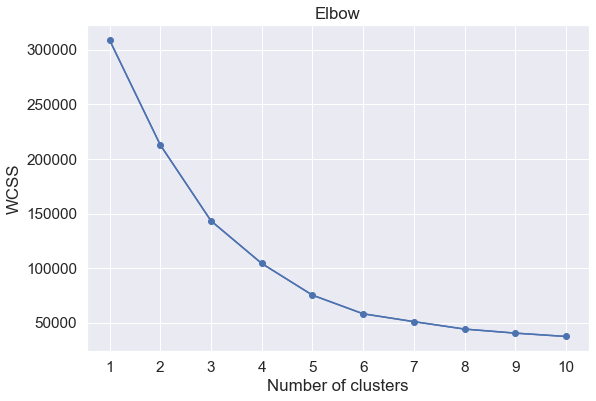

In [162]:
Elbow(df)

* 최적의 K : 5

In [207]:
def visualize_clusters(X, clusters):
    df = copy.deepcopy(X)
    df["label"] = clusters

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    fig = plt.figure(figsize=(20,13))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
    ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
    ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
    ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
    ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
    ax.view_init(30, 185)
    plt.xlabel("Age")
    plt.ylabel("Annual Income (k$)")
    ax.set_zlabel('Spending Score (1-100)')
    plt.show()

## 1. Hierarchical Clustering

In [200]:
agglo_model = AgglomerativeClustering(linkage="ward",affinity='euclidean',n_clusters=5)
agglomerative_clusters = agglo_model.fit_predict(df)

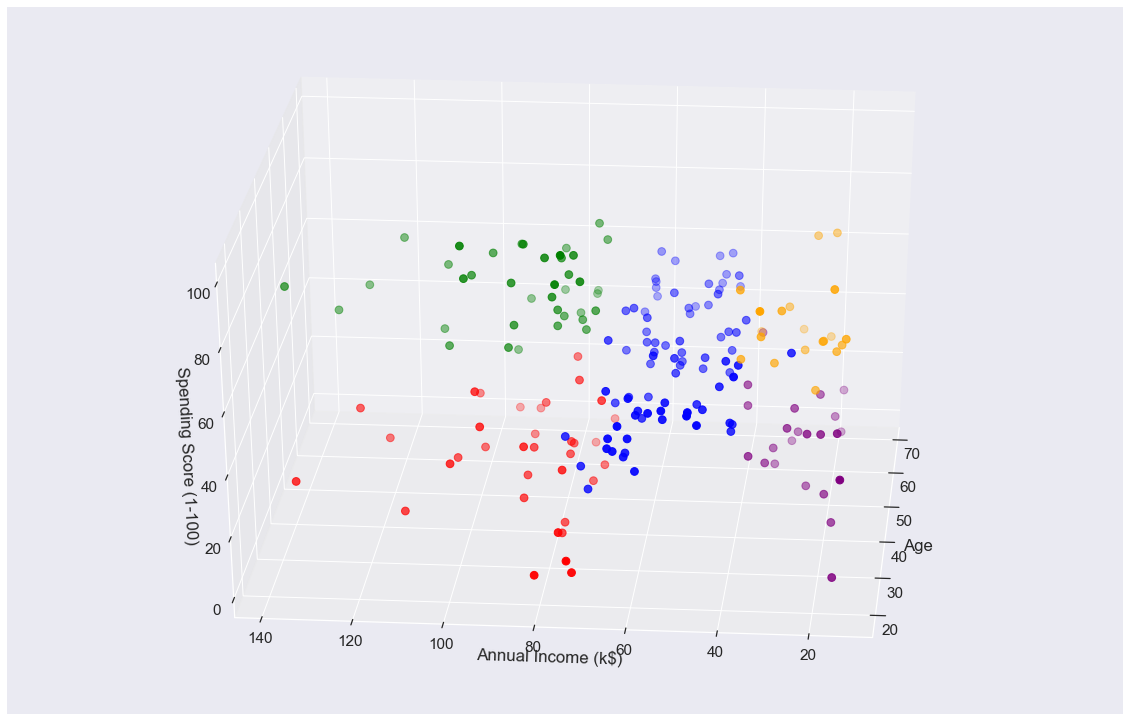

In [208]:
visualize_clusters(df, agglomerative_clusters)

## 2. K-means Clustering

In [209]:
kmeans = KMeans(n_clusters = 5)
kmeans_clusters = kmeans.fit_predict(df)

In [210]:
kmeans_clusters

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

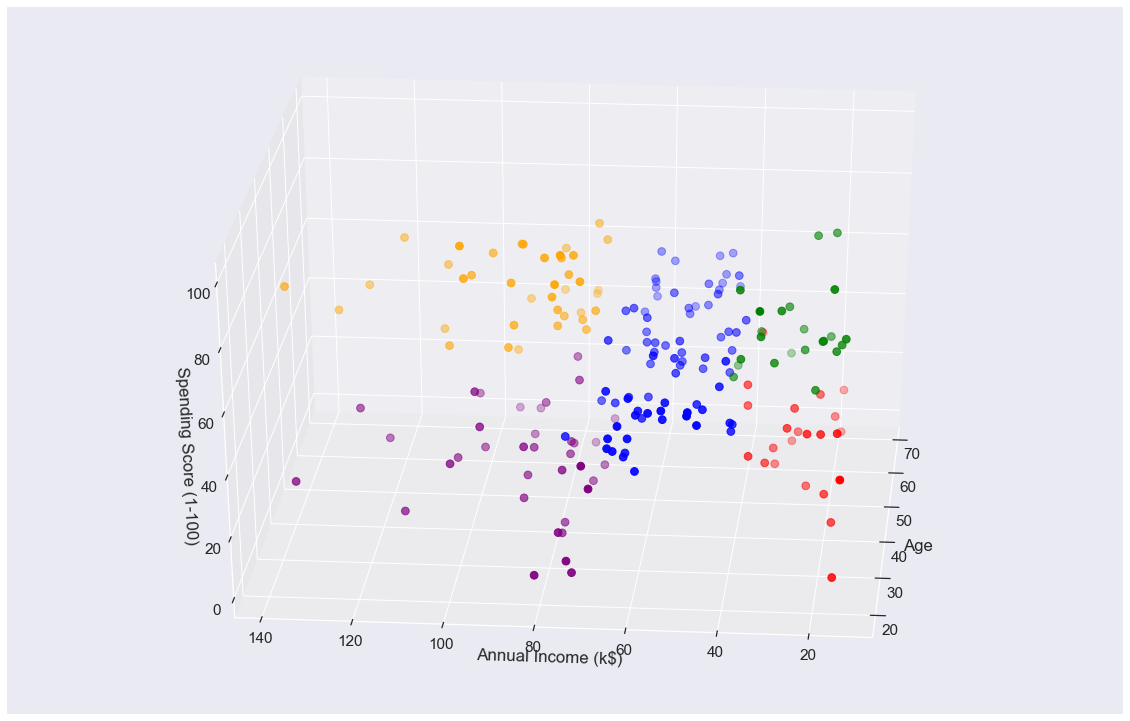

In [211]:
visualize_clusters(df, kmeans_clusters)

#### Age x Auual Income

In [294]:
AA_X = df.iloc[:, 1:3]

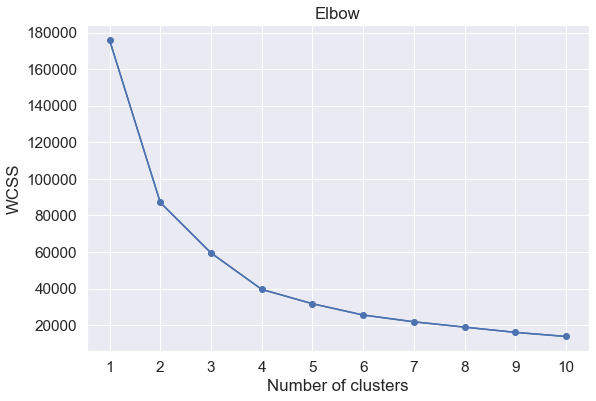

In [295]:
Elbow(AA_X)

In [296]:
kmeans_cluster = KMeans(n_clusters= 4)
y_kmeans= kmeans_cluster.fit_predict(AA_X)

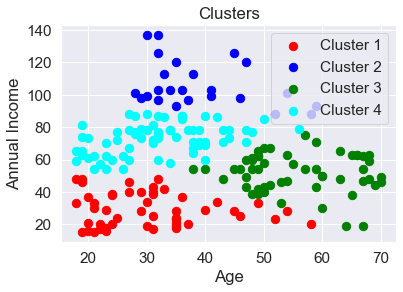

In [297]:
plt.scatter(AA_X.Age[y_kmeans == 0], AA_X["Annual Income (k$)"][y_kmeans == 0], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(AA_X.Age[y_kmeans == 1], AA_X["Annual Income (k$)"][y_kmeans == 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(AA_X.Age[y_kmeans == 2], AA_X["Annual Income (k$)"][y_kmeans == 2], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(AA_X.Age[y_kmeans == 3], AA_X["Annual Income (k$)"][y_kmeans == 3], s = 70, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

## 3. DBSCAN

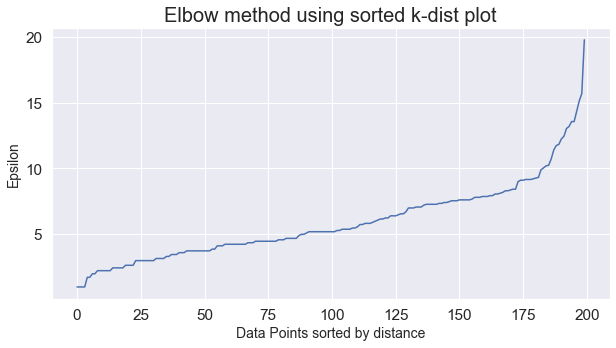

In [227]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(df)
distances, indices = neighbors.kneighbors(df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

* eps = 10
* min_samples = 4

In [290]:
model_dbscan = DBSCAN(eps=10, min_samples=4,  metric='euclidean')
dbscan_clusters = model_dbscan.fit_predict(df)

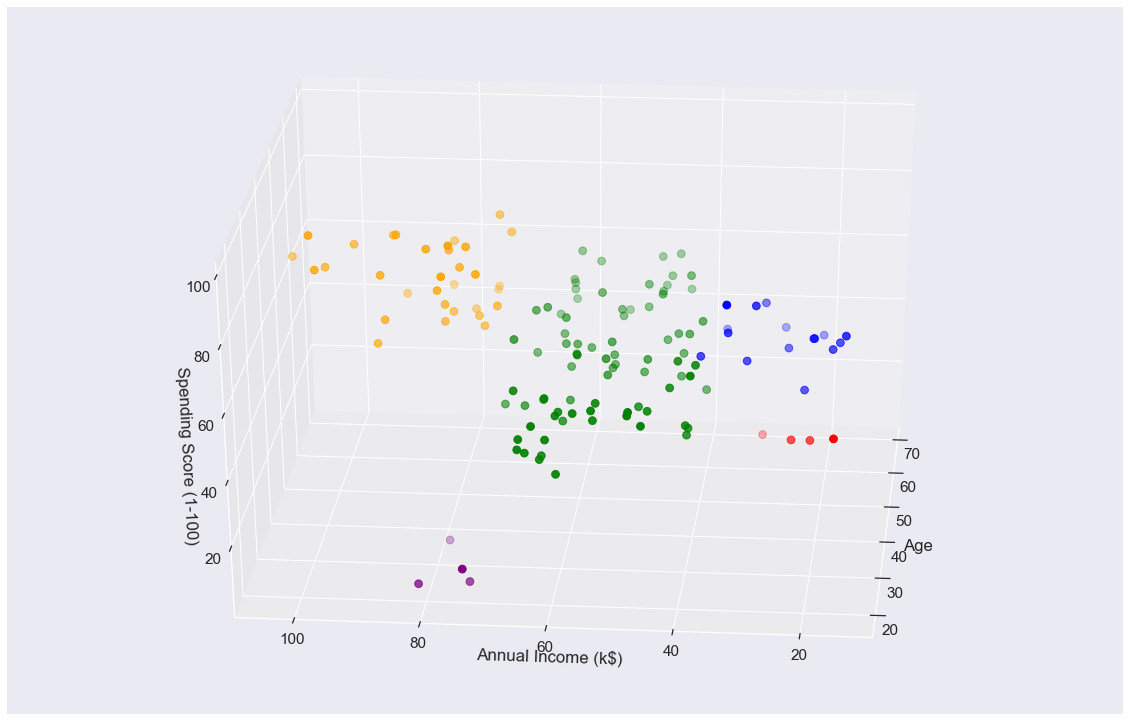

In [293]:
visualize_clusters(df, dbscan_clusters)

### 3가지 Cluster별 각 변수의 분포 그래프

In [319]:
def plot_num_cat(X, feature, clusters, method, figsize=None):
    df = copy.deepcopy(X)
    df["label"] = clusters
    fig = plt.figure(figsize=(10,6))

    for value in df["label"].unique():
        sns.kdeplot(df[df["label"]==value][feature])

    fig.legend(labels=df["label"].unique())
    plt.title('{} distribution based on {} clusters'.format(feature, method))
    plt.show()

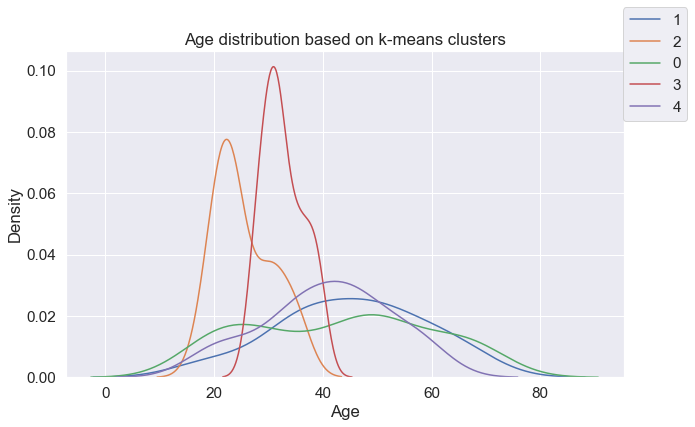

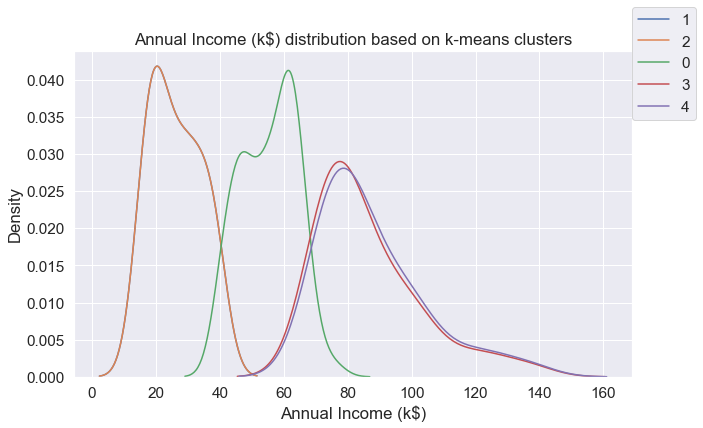

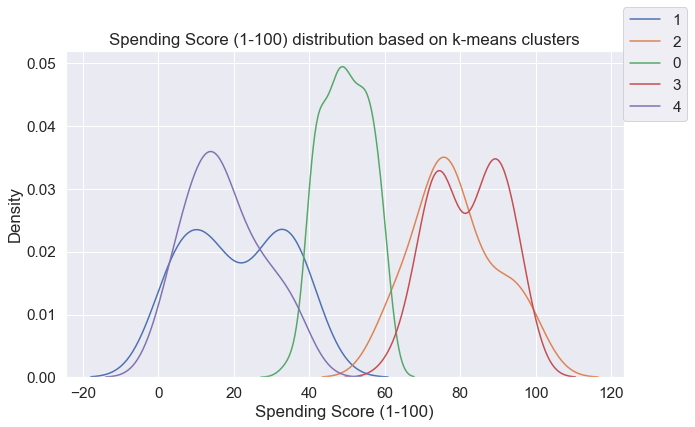

In [328]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for feature in features:
    plot_num_cat(df, feature, kmeans_clusters, 'k-means')

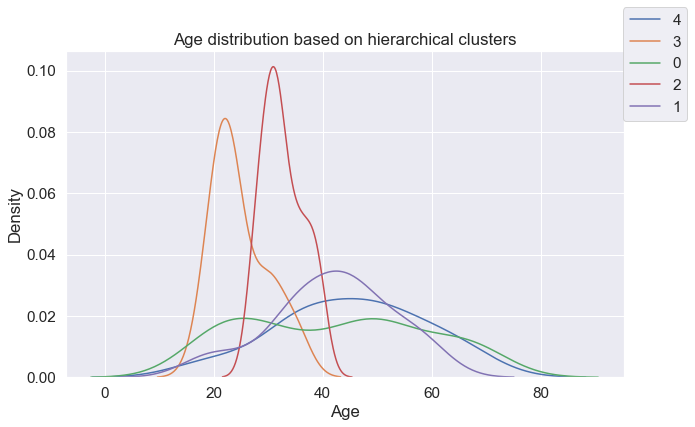

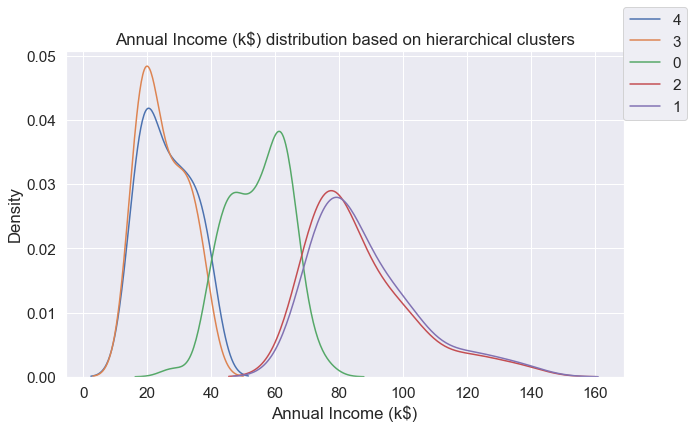

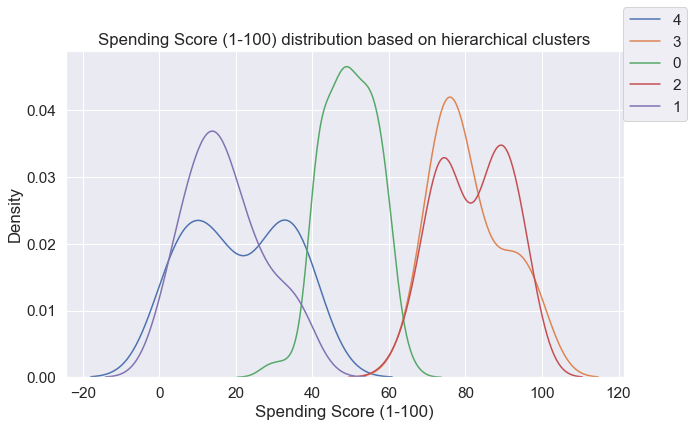

In [323]:
for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plot_num_cat(df, feature, agglomerative_clusters, 'hierarchical')

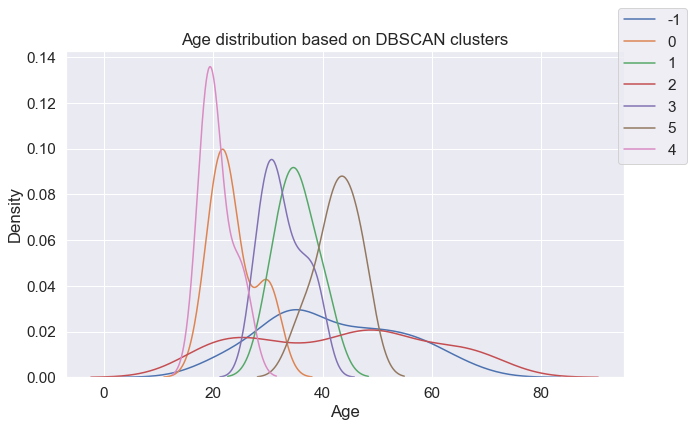

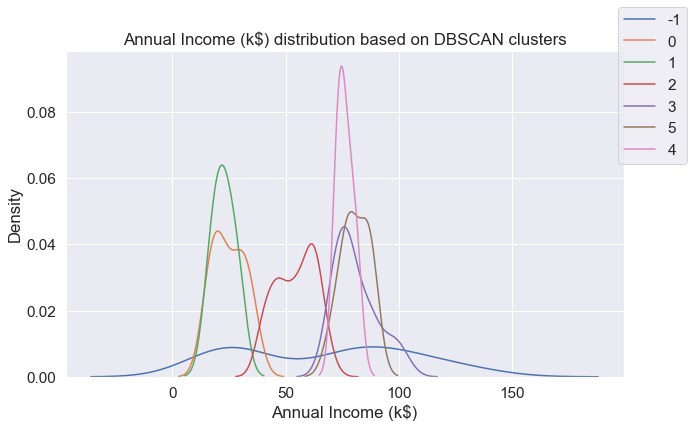

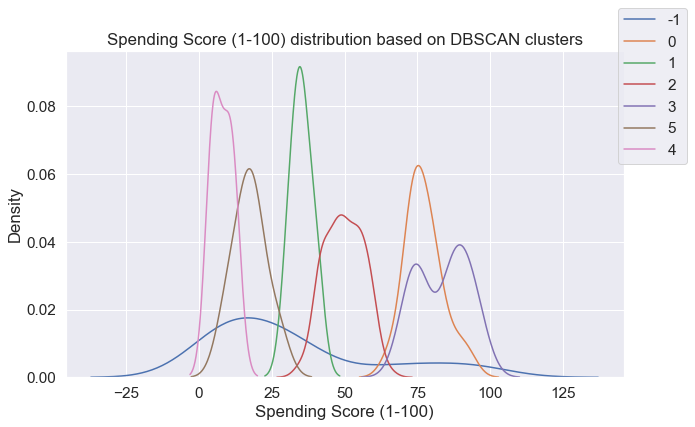

In [329]:
for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plot_num_cat(df, feature, dbscan_clusters, 'DBSCAN')